## Laborator 4

## Obiective

* familiaziraze cu tensorflow slim.
* modificarea unei retele neurale in slim
* vizualizare date input
* vizualizare activari
* tf.metrics


## Pasul 0. Upload dependinte Python#

* cifar10.py
* download.py
* dataset.py
* cache.py


In [19]:

from google.colab import files
uploaded = files.upload()
print("OK")

Saving download.py to download (6).py
Saving dataset.py to dataset (7).py
Saving cifar10.py to cifar10 (6).py
Saving cache.py to cache (6).py
OK


In [1]:
# verificam ca totul este ok
!ls .

cache (1).py  cifar10 (1).py  ckpts	      dataset (4).py   download (3).py
cache (2).py  cifar10 (2).py  data	      dataset (5).py   download (4).py
cache (3).py  cifar10 (3).py  datalab	      dataset (6).py   download (5).py
cache (4).py  cifar10 (4).py  dataset (1).py  dataset.py       download.py
cache (5).py  cifar10 (5).py  dataset (2).py  download (1).py  __pycache__
cache.py      cifar10.py      dataset (3).py  download (2).py


## Pasul 1. Incarcarea dataset-ului

In [0]:
import cifar10


In [21]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [22]:
!ls data/CIFAR-10

cifar-10-batches-py  cifar-10-python.tar.gz


## Pasul 2. Inspecatarea dataset-ului. Histograma + Imagini sample

In [23]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [24]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [29]:
import numpy as np

print(images_train.shape)
print(images_test.shape)

# one hot encodings
print(labels_train.shape)
print(labels_test.shape)

# class labels
print(cls_train.shape)
print(cls_test.shape)


print("Train count {}".format(images_train.shape[0]))
print("Test count {}".format(images_test.shape[0]))

cls_ids = np.unique(cls_train)
print("Class labels {}.".format(cls_ids))

n_classes = len(cls_ids)
print("Num classes {}".format(n_classes))





(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
(50000,)
(10000,)
Train count 50000
Test count 10000
Class labels [0 1 2 3 4 5 6 7 8 9].
Num classes 10


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

In [0]:
# check data statistics

def get_stats(labels):
    stats = np.zeros(n_classes)
    for e in labels:
        stats[e] += 1
    return stats
  
# bar_width = 0.
def plot_stats(stats, title):
    plt.figure()
    x = range(n_classes)
    plt.title(title)
    plt.bar(x, stats)

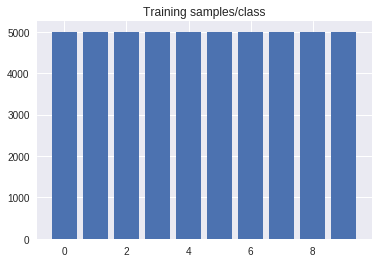

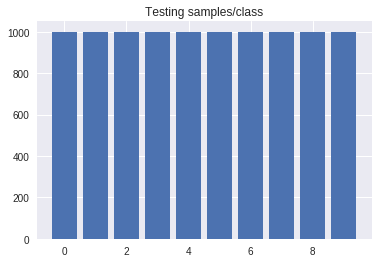

In [32]:
y_train = cls_train
y_test = cls_test

X_train = images_train
X_test = images_test

train_stats = get_stats(y_train)
test_stats = get_stats(y_test)

plt.figure()
plot_stats(train_stats, "Training samples/class")
plot_stats(test_stats, "Testing samples/class")

### Vizualizati dataset-ul cu sample-uri din fiecare clasa.

In [0]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

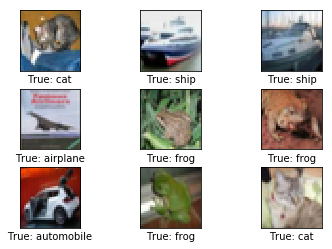

In [0]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

In [34]:
num_samples = 10

image_shape = images_train.shape[1:]

img_height, img_width = image_shape[0], image_shape[1]

print("hxw {}x{}".format(img_height, img_width))

def draw_samples(X, y, y_target, num_cl, colormap = None):
    c_ids = np.where(y == y_target)
    selected_idx = random.sample(c_ids[0].tolist(), num_samples)
    for i, idx in enumerate(selected_idx):
        plt.subplot(num_cl, num_samples, (num_samples * y_target) + i + 1)
        plt.axis('off')
        plt.imshow(X[idx], colormap)

hxw 32x32


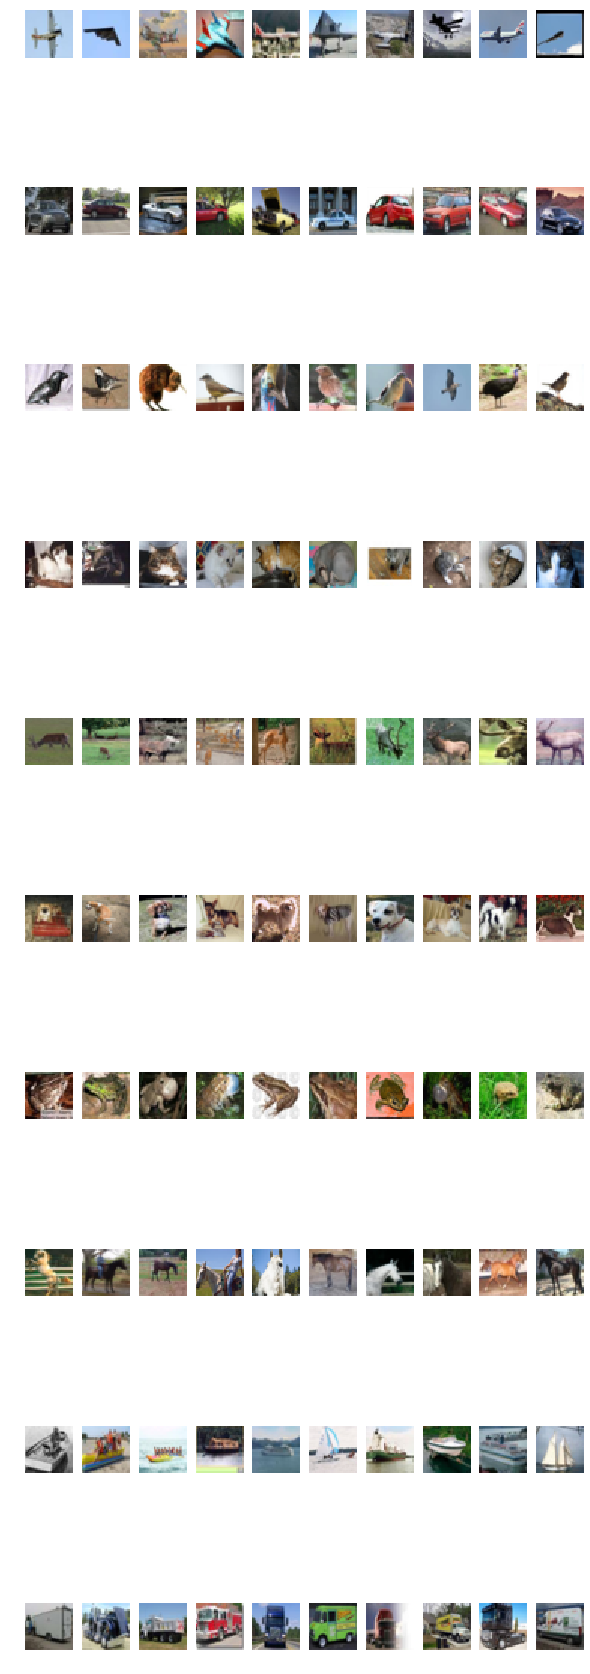

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# index = random.randint(0, len(X_train))
# image = X_train[index].squeeze()



plt.figure(figsize=(num_samples, img_width))
for c in range(n_classes):
    draw_samples(X_train, y_train, c, n_classes)
# 
# plt.imshow(image)
# plt.axis('off')
# print(y_train[index])

## Pasul 3. Definirea modelului in TensorFlow

### *Nota* Vom folosi tensoflow slim pentru a ne face viata mai usoara.

In [0]:
import tensorflow as tf

slim = tf.contrib.slim
trunc_normal = lambda stddev: tf.truncated_normal_initializer(stddev=stddev)


## Definirea unui argument scope. 

Un argument scope furnizeaza parametri default pentru operatiile din slim.
Pentru a consulta parametri default, ne putem uita direct in codul sursa:

https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/layers/python/layers/layers.py#L917

In [0]:
def cifarnet_arg_scope(weight_decay=0.004, is_training=True):
  """Defines the default cifarnet argument scope.

  Args:
    weight_decay: The weight decay to use for regularizing the model.

  Returns:
    An `arg_scope` to use for the cifarnet model.
  """
  with slim.arg_scope(
      [slim.conv2d],
      weights_initializer=tf.truncated_normal_initializer(stddev=5e-2),
      activation_fn=tf.nn.relu):
    with slim.arg_scope(
        [slim.fully_connected],
        biases_initializer=tf.constant_initializer(0.1),
        weights_initializer=trunc_normal(0.04),
        weights_regularizer=slim.l2_regularizer(weight_decay),
        normalizer_fn=None,
        activation_fn=tf.nn.relu) as sc:
      return sc


## CifarNet

In [0]:
trunc_normal = lambda stddev: tf.truncated_normal_initializer(stddev=stddev)

def cifarnet(images, num_classes=10, is_training=False,
             dropout_keep_prob=0.5,
             prediction_fn=slim.softmax,
             scope='CifarNet'):
 
  end_points = {}

  with tf.variable_scope(scope, 'CifarNet', [images]):
    net = slim.conv2d(images, 64, [5, 5], scope='conv1')
    end_points['conv1'] = net
    net = slim.max_pool2d(net, [2, 2], 2, scope='pool1')
    end_points['pool1'] = net
    net = slim.conv2d(net, 64, [5, 5], scope='conv2')
    end_points['conv2'] = net
    net = slim.max_pool2d(net, [2, 2], 2, scope='pool2')
    end_points['pool2'] = net
    net = slim.flatten(net)
    end_points['Flatten'] = net
    net = slim.fully_connected(net, 384, scope='fc3')
    end_points['fc3'] = net
    net = slim.dropout(net, dropout_keep_prob, is_training=is_training,
                       scope='dropout3')
    net = slim.fully_connected(net, 192, scope='fc4')
    end_points['fc4'] = net
    if not num_classes:
      return net, end_points
    logits = slim.fully_connected(net, num_classes,
                                  biases_initializer=tf.zeros_initializer(),
                                  weights_initializer=trunc_normal(1/192.0),
                                  weights_regularizer=None,
                                  activation_fn=None,
                                  scope='logits')

    end_points['Logits'] = logits
    end_points['Predictions'] = prediction_fn(logits, scope='Predictions')

  return logits, end_points

In [0]:
# parametri de training si input
batch_size = 32
height = 32
width = 32
channels = 3
num_classes = 10
initial_learning_rate = 0.05

### Adaugarea conexiunilor de intrare. tf.placeholders

In [0]:
    def add_placeholders():


        def _process_image(augment_level, image):
            # Because these operations are not commutative, consider randomizing
            # randomize the order their operation.
            if augment_level > 0:
                image = tf.image.random_brightness(image, max_delta=30)
                image = tf.image.random_contrast(image, lower=0.75, upper=1.25)
            if augment_level > 1:
                image = tf.image.random_saturation(image, lower=0.5, upper=1.6)
                image = tf.image.random_hue(image, max_delta=0.15)
            image = tf.minimum(image, 255.0)
            image = tf.maximum(image, 0)
            return image

        # image batch input
        image_input = tf.placeholder(
            tf.float32, [batch_size, height, width, 3],
            name='image_input'
        )

        label_input = tf.placeholder(
            tf.int64, [batch_size],
            name='label_input'
        )
        
        is_training = tf.placeholder(tf.bool, name='is_training')
        
        learning_rate = tf.placeholder(tf.float32, shape=[])
        
        return image_input, label_input, is_training, learning_rate


### Nota
Pentru augmentare adaugati o operatie tensorflow in input:

```

if is_training:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), _process_image(1, image_input))
else:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), self.image_input)

scaled_input_tensor = tf.subtract(scaled_input_tensor, 0.5)
self.scaled_input_tensor = tf.multiply(scaled_input_tensor, 2.0)

```

Mai sus se opereaza folosind `_process_image` augmenatere de brgithnes si saturation.
Inainte, input-ul este normalizat.

Normalizarea se efectueaza atat la training cat si la testing.
Augmentarea se efectueaza doar la testing si are rol in generelizare.

Puteti folosi si horizontal flipping `tf.image.random_flip_left_right`

https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right


In [41]:
images_train.shape

(50000, 32, 32, 3)

In [42]:
labels_train.shape

(50000, 10)

In [43]:
np.unique(cls_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Functie helper pentru a incarca un minibatch random la training

In [0]:
def random_batch(img, labels):
    # Number of images in the training-set.
    num_images = len(img)
    #     print(num_images)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=batch_size,
                           replace=False)

    # Use the random index to select random images and labels.
    x_batch = img[idx, :, :, :]
    y_batch = labels[idx]

    return x_batch, y_batch

In [45]:
x, y = random_batch(X_train, y_train)

y.shape

(32,)

### Functie helper pentru obtinirea unui batch la test. Nu facem shuffle la test

In [46]:
def get_batch(imgs, labels, step):
  offset = (step * batch_size) % (labels.shape[0] - batch_size)
#   print(offset)
  batch_imgs = imgs[offset:(offset + batch_size), :, :, :]
  batch_labels = labels[offset:(offset + batch_size)]
  
  return batch_imgs, batch_labels
  
batch_imgs, batch_labels = get_batch(images_test, cls_test, 2)
  
print(batch_imgs.shape)
print(batch_labels.shape)
  

(32, 32, 32, 3)
(32,)


### Functie pentru evaluare acuratete

In [0]:
#evaluate model



def evaluate():
  total_examples = cls_test.shape[0]  
  iters = int(total_examples/batch_size)
#   print("Total examples {}".format(total_examples))
#   print("Total iters {}".format(iters))
  
  
  acc = []
  losses = []
    
  for i in range(iters):
    
    x, y = get_batch(images_test, cls_test, i)

    feed_dict = {

        image_input: x,
        label_input: y,
        is_training: False

    }

    testAcc, testLoss = sess.run([accuracy, loss], feed_dict=feed_dict)
    acc.append(testAcc)
    losses.append(testLoss)
    #if i % 100 == 0:
    #  print("Test " + str(i) + ": accuracy:" + str(testAcc) + " loss: " + str(testLoss))
    
      
#   print(acc)
  meanAcc = np.mean(np.asarray(acc))
  meanLoss = np.mean(np.asarray(losses))
  
#   print("Test Accuracy {:.2f} %".format(meanAcc * 100))
  
  return meanAcc, meanLoss
  
  
#evaluate()               


In [0]:
trainingAccuracyList = []
trainingLossList = []
testAccuracyList = []
testLossList = []
learningRateList = []

### Definirea pasilor de antrenare

In [49]:

num_steps = 50000
num_examples = images_train.shape[0]
iters = num_examples / batch_size
learning_rate_step = 20000
learning_rate_decay = 0.1

tf.reset_default_graph()

g = tf.Graph().as_default()
image_input, label_input, is_training, learning_rate = add_placeholders()
arg_scope = cifarnet_arg_scope(is_training=is_training)
with slim.arg_scope(arg_scope):
  logits, end_points = cifarnet(image_input, is_training=is_training)

loss = tf.reduce_mean(
  tf.nn.sparse_softmax_cross_entropy_with_logits(labels=label_input, logits=logits))

# accuracy of the trained model, between 0 (worst) and 1 (best)
predictions = end_points['Predictions']

correct_prediction = tf.equal(tf.argmax(predictions, 1), label_input)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


init = tf.global_variables_initializer()


sess = tf.Session()
# actually initialize our variables
sess.run(init)



# Optimizer.
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# for batch norm training. Note: we should use slim.train_op

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
  # Ensures that we execute the update_ops before performing the train_step
  optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
  

  
running_lr = initial_learning_rate

print("Starting optimization")
print("Initial LR {}. LR stepdown itnerval {}. LR deacy factor {}".format(running_lr, learning_rate_step, learning_rate_decay))

for i in range(num_steps):
  x, y = random_batch(X_train, y_train)

  feed_dict = {

      image_input: x,
      label_input: y,
      is_training: True,
      learning_rate : running_lr

  }

  if i % 200 == 0:
      _, trainAcc, trainLoss = sess.run([optimizer, accuracy, loss], feed_dict=feed_dict)
      
      testAcc, testLoss = evaluate()
      
      print("Train " + str(i) + ": accuracy:" + str(trainAcc) + " loss: " + str(trainLoss))
      print("Test " + str(i) + ": accuracy:" + str(testAcc) + " loss: " + str(testLoss))
      
      trainingAccuracyList.append(trainAcc)
      trainingLossList.append(trainLoss)
      testAccuracyList.append(testAcc)
      testLossList.append(testLoss)
      learningRateList.append(running_lr)
     
  else:
      sess.run([optimizer], feed_dict=feed_dict)
  
  
  if  i > 0 and i % learning_rate_step == 0:
      print("Learning reate step down. Old {}. New {}".format(running_lr, running_lr * learning_rate_decay))
      running_lr = running_lr * learning_rate_decay
      
          
    




      

Starting optimization
Initial LR 0.05. LR stepdown itnerval 10000. LR deacy factor 0.1
Train 0: accuracy:0.03125 loss: 2.3009028
Test 0: accuracy:0.100160256 loss: 2.3038263
Train 200: accuracy:0.1875 loss: 2.1432652
Test 200: accuracy:0.25741187 loss: 2.0858715
Train 400: accuracy:0.3125 loss: 2.0304542
Test 400: accuracy:0.21203926 loss: 2.2223592
Train 600: accuracy:0.34375 loss: 1.8292689
Test 600: accuracy:0.36939102 loss: 1.7574744
Train 800: accuracy:0.4375 loss: 1.6514752
Test 800: accuracy:0.39753607 loss: 1.6537637
Train 1000: accuracy:0.34375 loss: 1.9638436
Test 1000: accuracy:0.40364584 loss: 1.6184564
Train 1200: accuracy:0.25 loss: 2.2289958
Test 1200: accuracy:0.36227965 loss: 1.8664716
Train 1400: accuracy:0.46875 loss: 1.5886004
Test 1400: accuracy:0.46314102 loss: 1.4863704
Train 1600: accuracy:0.375 loss: 1.8298221
Test 1600: accuracy:0.45923477 loss: 1.4740908
Train 1800: accuracy:0.34375 loss: 1.6238337
Test 1800: accuracy:0.4619391 loss: 1.457517
Train 2000: accu

Train 9000: accuracy:0.71875 loss: 0.73430943
Test 9000: accuracy:0.65965545 loss: 0.9680571
Train 9200: accuracy:0.78125 loss: 0.6134459
Test 9200: accuracy:0.6682692 loss: 0.9494472
Train 9400: accuracy:0.65625 loss: 1.0160942
Test 9400: accuracy:0.6510417 loss: 0.9998546
Train 9600: accuracy:0.6875 loss: 0.9312861
Test 9600: accuracy:0.671875 loss: 0.9489897
Train 9800: accuracy:0.65625 loss: 0.9645174
Test 9800: accuracy:0.6489383 loss: 1.0106158
Train 10000: accuracy:0.625 loss: 1.0782597
Test 10000: accuracy:0.6706731 loss: 0.944987
Learning reate step down. Old 0.05. New 0.005000000000000001
Train 10200: accuracy:0.84375 loss: 0.6521797
Test 10200: accuracy:0.6913061 loss: 0.8781636
Train 10400: accuracy:0.84375 loss: 0.45338696
Test 10400: accuracy:0.69451123 loss: 0.8730379
Train 10600: accuracy:0.78125 loss: 0.5930927
Test 10600: accuracy:0.6985176 loss: 0.8746457
Train 10800: accuracy:0.8125 loss: 0.56488645
Test 10800: accuracy:0.6990184 loss: 0.8690105
Train 11000: accurac

KeyboardInterrupt: ignored

### Plotting

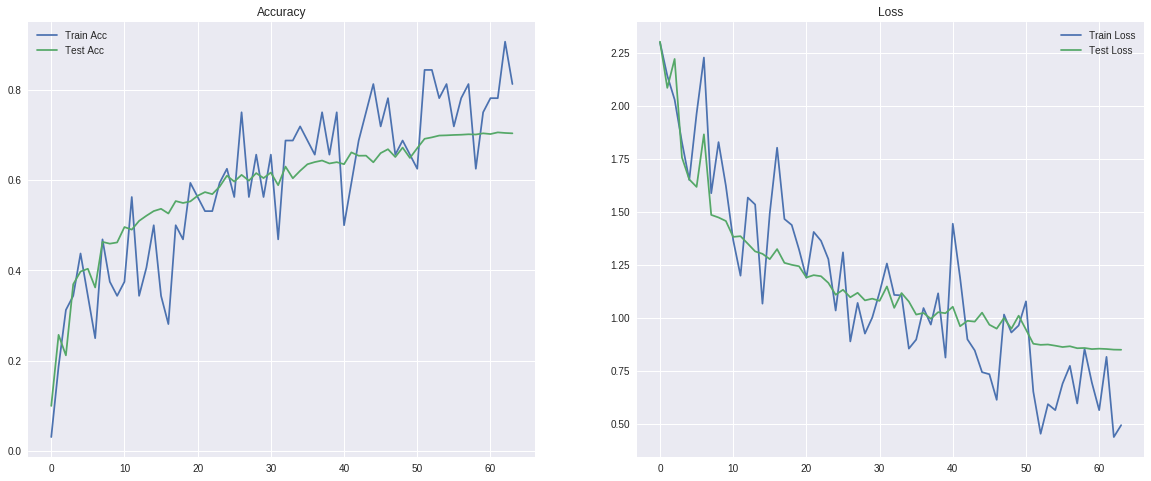

In [51]:
plt.figure(figsize=(20,8))

# Plot Accuracy
plt.subplot(1,2,1);
plt.plot(trainingAccuracyList, label="Train Acc");
plt.plot(testAccuracyList, label="Test Acc");
plt.title("Accuracy");
plt.legend();

# Plot Loss
plt.subplot(1,2,2);
plt.plot(trainingLossList, label="Train Loss");
plt.plot(testLossList, label="Test Loss");
plt.title("Loss");
plt.legend();

## Evaluate final model

In [52]:

  
acc, test_loss = evaluate()

print("Test accuracy:" + str(acc) + " loss: " + str(test_loss))
                   

Test accuracy:0.70252407 loss: 0.85677105


## Save a model checkpoint. Restoring a model checkpoint

In [53]:
# Save / restore model

#!mkdir ckpts

vars_to_save = tf.global_variables()
saver = tf.train.Saver(var_list=vars_to_save)


model_name ='./ckpts/cifarnet-baseline.ckpt'
saver.save(sess, model_name, global_step=num_steps)
print(vars_to_save)

[<tf.Variable 'CifarNet/conv1/weights:0' shape=(5, 5, 3, 64) dtype=float32_ref>, <tf.Variable 'CifarNet/conv1/biases:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/weights:0' shape=(5, 5, 64, 64) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/biases:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/fc3/weights:0' shape=(4096, 384) dtype=float32_ref>, <tf.Variable 'CifarNet/fc3/biases:0' shape=(384,) dtype=float32_ref>, <tf.Variable 'CifarNet/fc4/weights:0' shape=(384, 192) dtype=float32_ref>, <tf.Variable 'CifarNet/fc4/biases:0' shape=(192,) dtype=float32_ref>, <tf.Variable 'CifarNet/logits/weights:0' shape=(192, 10) dtype=float32_ref>, <tf.Variable 'CifarNet/logits/biases:0' shape=(10,) dtype=float32_ref>]


## Exmplu calcul acuratete folosint tf.metrics

`tf.metrics.accuracy` 

```
labels = ...
predictions = ...
accuracy, update_op_acc = tf.metrics.accuracy(
    labels, predictions)
error, update_op_error = tf.metrics.mean_absolute_error(
    labels, predictions)

sess.run(tf.local_variables_initializer())
for batch in range(num_batches):
  sess.run([update_op_acc, update_op_error])

accuracy, mean_absolute_error = sess.run([accuracy, mean_absolute_error])

```

https://www.tensorflow.org/api_docs/python/tf/metrics


## Testing model restore works

In [54]:
# test restore works
evaluate()
sess.run(init)
evaluate()
vars_to_restore = tf.global_variables()
saver = tf.train.Saver(var_list=vars_to_restore)
model_to_restore = "{}-{}".format(model_name, num_steps)
saver.restore(sess, model_to_restore)
evaluate()

INFO:tensorflow:Restoring parameters from ./ckpts/cifarnet-baseline.ckpt-50000


(0.70252407, 0.85677105)

In [0]:
#!ls ./ckpts

### One hot encoding

In [55]:
x, y = get_batch(images_test, cls_test, i)

y = y[:4]
print(y)
print(num_classes)

res = tf.one_hot(indices=y, depth=num_classes)
print(sess.run(res))

[0 4 0 1]
10
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Masurarea performantelor retelei folosind tf.metrics

In [56]:
# Remember

# predictions = end_points['Predictions']
# correct_prediction = tf.equal(tf.argmax(predictions, 1), label_input)
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# adaugam on nod pentru one hot

labels = tf.one_hot(indices=label_input, depth=num_classes)
# accuracy_streamed, update_op_acc = tf.contrib.metrics.streaming_accuracy(label_input, tf.argmax(predictions, 1))

accuracy_streamed, update_op_acc = tf.metrics.accuracy(label_input, tf.argmax(predictions, 1))

# init = tf.global_variables_initializer()
sess.run(tf.local_variables_initializer())
  

vars_to_restore = tf.global_variables()
saver = tf.train.Saver(var_list=vars_to_restore)
saver.restore(sess, model_to_restore)

evaluate()


INFO:tensorflow:Restoring parameters from ./ckpts/cifarnet-baseline.ckpt-50000


(0.70252407, 0.85677105)

In [57]:

def evaluate_streaming():
  total_examples = cls_test.shape[0]
  num_batches = int(total_examples / batch_size)
  print("Total examples {}".format(total_examples))
  print("Total iters {}".format(num_batches))
  
  for i in range(num_batches):
    
    x, y = get_batch(images_test, cls_test, i)

    feed_dict = {

        image_input: x,
        label_input: y,
        is_training: False

    }

    #testAcc, testLoss = sess.run([accuracy, loss], feed_dict=feed_dict)
    
    if i % 10 == 0:
      _, test_acc = sess.run([update_op_acc, accuracy_streamed],  feed_dict=feed_dict)
      print("Test " + str(i) + ": accuracy:" + str(test_acc))
    
    else:
      sess.run([update_op_acc], feed_dict=feed_dict)
    
      
  test_acc = sess.run(accuracy_streamed)
  print("Mean Accuracy  {:.2f} %".format(test_acc * 100))
  
  
evaluate_streaming()

Total examples 10000
Total iters 312
Test 0: accuracy:0.0
Test 10: accuracy:0.690625
Test 20: accuracy:0.703125
Test 30: accuracy:0.70416665
Test 40: accuracy:0.71875
Test 50: accuracy:0.716875
Test 60: accuracy:0.7140625
Test 70: accuracy:0.7089286
Test 80: accuracy:0.70273435
Test 90: accuracy:0.7017361
Test 100: accuracy:0.703125
Test 110: accuracy:0.703125
Test 120: accuracy:0.7036458
Test 130: accuracy:0.70408654
Test 140: accuracy:0.70625
Test 150: accuracy:0.7083333
Test 160: accuracy:0.7097656
Test 170: accuracy:0.7088235
Test 180: accuracy:0.70815974
Test 190: accuracy:0.7057566
Test 200: accuracy:0.7060937
Test 210: accuracy:0.7059524
Test 220: accuracy:0.70454544
Test 230: accuracy:0.70516306
Test 240: accuracy:0.7049479
Test 250: accuracy:0.704625
Test 260: accuracy:0.70372593
Test 270: accuracy:0.7023148
Test 280: accuracy:0.70267856
Test 290: accuracy:0.7042026
Test 300: accuracy:0.70395833
Test 310: accuracy:0.70282257
Mean Accuracy  70.25 %


## Task 1(pentru acasa). Masurati acuratetea modelului pe clasa

## Variabile locale vs Variabile globale

In [58]:
tf.local_variables()

[<tf.Variable 'accuracy/total:0' shape=() dtype=float32_ref>,
 <tf.Variable 'accuracy/count:0' shape=() dtype=float32_ref>]

In [59]:
tf.global_variables()

[<tf.Variable 'CifarNet/conv1/weights:0' shape=(5, 5, 3, 64) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv1/biases:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv2/weights:0' shape=(5, 5, 64, 64) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv2/biases:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/fc3/weights:0' shape=(4096, 384) dtype=float32_ref>,
 <tf.Variable 'CifarNet/fc3/biases:0' shape=(384,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/fc4/weights:0' shape=(384, 192) dtype=float32_ref>,
 <tf.Variable 'CifarNet/fc4/biases:0' shape=(192,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/logits/weights:0' shape=(192, 10) dtype=float32_ref>,
 <tf.Variable 'CifarNet/logits/biases:0' shape=(10,) dtype=float32_ref>]

In [0]:
!ls ckpts

checkpoint
cifarnet-100k-bn.ckpt-100000.data-00000-of-00001
cifarnet-100k-bn.ckpt-100000.index
cifarnet-100k-bn.ckpt-100000.meta
cifarnet1-bn.ckpt-100000.data-00000-of-00001
cifarnet1-bn.ckpt-100000.index
cifarnet1-bn.ckpt-100000.meta
cifarnet2-bn.ckpt-100000.data-00000-of-00001
cifarnet2-bn.ckpt-100000.index
cifarnet2-bn.ckpt-100000.meta
cifarnet3-bn.ckpt-100000.data-00000-of-00001
cifarnet3-bn.ckpt-100000.index
cifarnet3-bn.ckpt-100000.meta
cifarnet-50kbn.ckpt-100000.data-00000-of-00001
cifarnet-50kbn.ckpt-100000.index
cifarnet-50kbn.ckpt-100000.meta
cifarnet-bn.ckpt-100000.data-00000-of-00001
cifarnet-bn.ckpt-100000.index
cifarnet-bn.ckpt-100000.meta


# Vizualizarea Activarilor din retea

In [0]:
# visualize endpoints
end_points


{'Flatten': <tf.Tensor 'CifarNet/Flatten/flatten/Reshape:0' shape=(32, 4096) dtype=float32>,
 'Logits': <tf.Tensor 'CifarNet/logits/BiasAdd:0' shape=(32, 10) dtype=float32>,
 'Predictions': <tf.Tensor 'CifarNet/Predictions/Reshape_1:0' shape=(32, 10) dtype=float32>,
 'conv1': <tf.Tensor 'CifarNet/conv1/Relu:0' shape=(32, 32, 32, 64) dtype=float32>,
 'conv2': <tf.Tensor 'CifarNet/conv2/Relu:0' shape=(32, 16, 16, 64) dtype=float32>,
 'fc3': <tf.Tensor 'CifarNet/fc3/Relu:0' shape=(32, 384) dtype=float32>,
 'fc4': <tf.Tensor 'CifarNet/fc4/Relu:0' shape=(32, 192) dtype=float32>,
 'pool1': <tf.Tensor 'CifarNet/pool1/MaxPool:0' shape=(32, 16, 16, 64) dtype=float32>,
 'pool2': <tf.Tensor 'CifarNet/pool2/MaxPool:0' shape=(32, 8, 8, 64) dtype=float32>}

In [0]:
def plotActivations(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        ax = plt.gca()
        ax.grid(False)
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

In [0]:
conv1 = end_points['conv1']

x, y = random_batch(X_train, y_train)

feed_dict = {

      image_input: x,
      label_input: y,
      is_training: False

  }

conv1_fmaps = sess.run(conv1, feed_dict=feed_dict)
conv1_fmaps.shape
activ1 = conv1_fmaps[0, :, :, :]




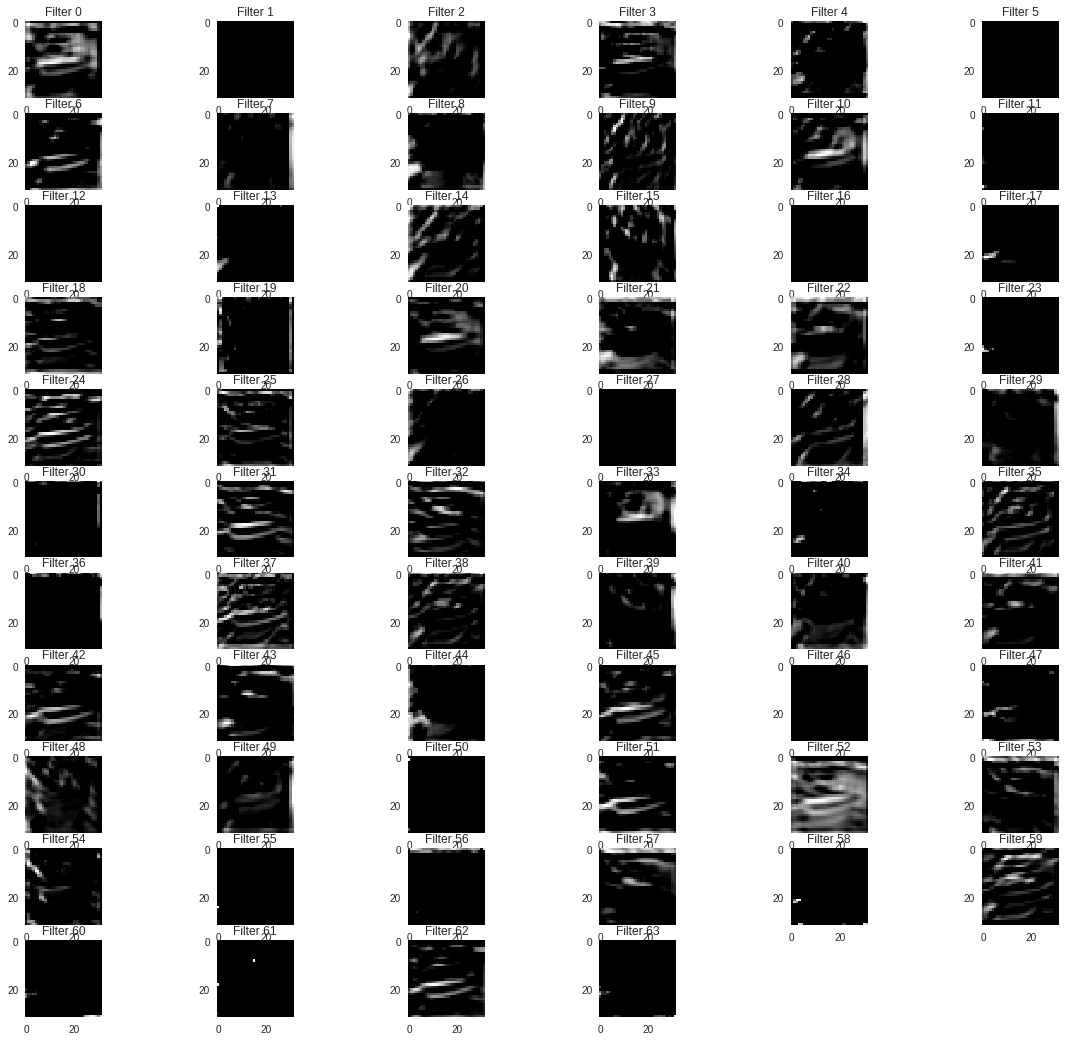

In [62]:
plotActivations(conv1_fmaps)

## Next Steps

### In clasa

1. Modificati parametri convolutiilor si dense (fully connected), * pastrand constanta arhitectura retelei* (doar din argument_scope diferit)
   Aveti in vedere:
    * Tipul de activare (relu, tanh)
    * Adaugati regularizare, normalizare batchnorm
    * input preprocessing
    * Adaugati batch norm si trageti concluzii

2. Observati layer-ele de MaxPooling2D. Ce fac aceste layere? Cu ce puteti inlocui layer-ul maxpool2d pastrand efectul pe dimensiuni?
  
Trageti concluzii in baza observatiilor.
Hints:
  * learning-rate-ul poate fi modificat
  * poate fi schimbat optimizatorul
  * lasati la antrenat cam 30 - 90 de epoci. Eu am antrenat 100K iteratii cu batch size 32. Pentru 50k imagini de train, inseamna 60 epoci.
  * Cu batch norm veti osberva diferenta in training.





### Acasa

** (10 p) ** 


1. Feel free sa experimentati pe CIFAR-10 cu:
  * arhitecturi imbunatatite 
  * data normalization
  * data augmentation
  * target-ul de performanta este > 78 %.
  
2. Masurarea acuratetii pe clasa.
3. Afisati top-3 probabilitati Sotfmax pentru 5 imagini impreauna cu clasa corespunzatoare. Puteti folosi matplotlib pentru a afisa probaiblitatile sub forma de barchart

Nota:

Pentru augmentare puteti folosi codul deja existent mai sus in functia ` def _process_image(augment_level, image)`. Aadaugati o operatie tensorflow in input:

```

if is_training:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), _process_image(1, image_input))
else:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), self.image_input)

scaled_input_tensor = tf.subtract(scaled_input_tensor, 0.5)
self.scaled_input_tensor = tf.multiply(scaled_input_tensor, 2.0)

```

Mai sus se opereaza folosind `_process_image` augmenatere de brightnes si saturation.
Inainte, input-ul este normalizat.


Normalizarea se efectueaza atat la training cat si la testing.
Augmentarea se efectueaza doar la testing si are rol in generelizare.

Puteti folosi si horizontal flipping `tf.image.random_flip_left_right`

https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right




** Bonus **

### Project: Build a Traffic Sign Recognition Program ###

Dataset-ul CIFAR-10 are clasele balansate si doar 10 clase.
Dataset-ul German Traffic Signs are clasele nebalansate. Astfel va beneficia mai mult de data augmentation.

Mai multe detalii gasiti la:

https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb
https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project


### Pasi pentru proiect ###
1. Descracati dataset-ul
https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
2. Clonati proiectul
git clone https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project

3. Urmariti pasii din notebook
cd CarND-Traffic-Sign-Classifier-Project
Launch the Jupyter notebook: jupyter notebook Traffic_Sign_Classifier.ipynb

4. Acuratetea target este > 93 %

Hint: Puteti incepe cu LeNet ca baseline.






